# Modelo de aprendizaje automático

## Preparacion de Datos 

### **Leer Datos** 

In [5]:
import pandas as pd

df = pd.read_json('..\ETL-EDA\EDA\EDA_Dataset.json.gz')

df

,user_id,item_id,recommend,sentiment_analysis,items_count,item_name,playtime_forever,genres,release_date,price,developer
0,76561197970982479,1250,1,2,277,Killing Floor,10006,[Action],2009,19.99,Tripwire Interactive
1,DJKamBer,1250,1,0,152,Killing Floor,2851,[Action],2009,19.99,Tripwire Interactive
2,diego9031,1250,1,1,200,Killing Floor,1204,[Action],2009,19.99,Tripwire Interactive
3,GamerFag,1250,1,2,64,Killing Floor,33723,[Action],2009,19.99,Tripwire Interactive
4,76561198092227136,1250,1,1,333,Killing Floor,8694,[Action],2009,19.99,Tripwire Interactive
...,...,...,...,...,...,...,...,...,...,...,...
38948,llDracuwulf,307130,1,1,14,Asteria,211,"[Action, Adventure, Indie]",2014,4.99,Legend Studio
38949,ChrisCoroner,209120,1,2,8,Street Fighter X Tekken,298,[Action],2012,29.99,"Capcom U.S.A., Inc."
38950,MeloncraftLP,220090,1,1,45,The Journey Down: Chapter One,403,"[Adventure, Indie]",2013,8.99,Skygoblin
38951,MeloncraftLP,262850,1,1,45,The Journey Down: Chapter Two,799,"[Adventure, Indie]",2014,19.99,Skygoblin


### **Nos quedamos con las columnas necesarias**

In [6]:
df = df[['user_id','recommend','sentiment_analysis','item_name','item_id']]
df

,user_id,recommend,sentiment_analysis,item_name,item_id
0,76561197970982479,1,2,Killing Floor,1250
1,DJKamBer,1,0,Killing Floor,1250
2,diego9031,1,1,Killing Floor,1250
3,GamerFag,1,2,Killing Floor,1250
4,76561198092227136,1,1,Killing Floor,1250
...,...,...,...,...,...
38948,llDracuwulf,1,1,Asteria,307130
38949,ChrisCoroner,1,2,Street Fighter X Tekken,209120
38950,MeloncraftLP,1,1,The Journey Down: Chapter One,220090
38951,MeloncraftLP,1,1,The Journey Down: Chapter Two,262850


### **Generamos la clasificacion necesaria para el modelo**


In [7]:
# Creamos una clasificacion para el modelo
df.loc[:, 'Calificacion'] = df[['recommend','sentiment_analysis']].sum(axis=1)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_11504\261698289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Calificacion'] = df[['recommend','sentiment_analysis']].sum(axis=1)


,user_id,recommend,sentiment_analysis,item_name,item_id,Calificacion
0,76561197970982479,1,2,Killing Floor,1250,3
1,DJKamBer,1,0,Killing Floor,1250,1
2,diego9031,1,1,Killing Floor,1250,2
3,GamerFag,1,2,Killing Floor,1250,3
4,76561198092227136,1,1,Killing Floor,1250,2
...,...,...,...,...,...,...
38948,llDracuwulf,1,1,Asteria,307130,2
38949,ChrisCoroner,1,2,Street Fighter X Tekken,209120,3
38950,MeloncraftLP,1,1,The Journey Down: Chapter One,220090,2
38951,MeloncraftLP,1,1,The Journey Down: Chapter Two,262850,2


### **Eliminar columnas innecesarias** 

In [8]:
df.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_11504\3280346144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['recommend', 'sentiment_analysis'], inplace=True)


# Preprocesamiento

In [9]:
df_ML = df.drop(columns='item_id')

### **Verificamos que el datagframe este bien para aplicarlo en el modelo**

In [10]:
df_ML

,user_id,item_name,Calificacion
0,76561197970982479,Killing Floor,3
1,DJKamBer,Killing Floor,1
2,diego9031,Killing Floor,2
3,GamerFag,Killing Floor,3
4,76561198092227136,Killing Floor,2
...,...,...,...
38948,llDracuwulf,Asteria,2
38949,ChrisCoroner,Street Fighter X Tekken,3
38950,MeloncraftLP,The Journey Down: Chapter One,2
38951,MeloncraftLP,The Journey Down: Chapter Two,2


## Creacion del modelo

In [1]:
from surprise import SVD
from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

In [2]:
# Creamos la escala
Escala_Clasificacion = Reader(rating_scale=(0,3))

In [ ]:
# Cargamos el dataset que vamos a usar
data = Dataset.load_from_df(df_ML, Escala_Clasificacion)

# Separamos el dataset en datos de entranamiento y datos de testeo
trainset, testset = train_test_split(data, test_size=0.3)

# dataset en un 70% para entrenar y 30% para probar el modelo.

### Usare el modelo de Singular Value Decomposition

In [12]:
modeloML = SVD(n_factors= 4, n_epochs=20, lr_all=0.005, reg_all=0.2)

In [13]:
# Entrenamos el modelo
modeloML.fit(trainset)

#Guardamos el modelo entrenado para posteriormente guardarlo en un archivo.
ModeloEntrenado = modeloML.fit(trainset)

In [14]:
# Predecimos
predictions = modeloML.test(testset)

### Evaluacion

In [15]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 0.7394


0.7394193081377788

## Optimizacion de hiperparametros

In [16]:
from surprise.model_selection import cross_validate
import numpy as np

rmse_test_means = []
factores = [1,2,4,8,16,32]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7475  0.7465  0.7415  0.7452  0.0026  
Fit time          0.13    0.11    0.15    0.13    0.02    
Test time         0.07    0.06    0.06    0.06    0.01    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7415  0.7437  0.7487  0.7447  0.0030  
Fit time          0.18    0.14    0.17    0.16    0.02    
Test time         0.05    0.06    0.06    0.05    0.00    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7343  0.7540  0.7458  0.7447  0.0081  
Fit time          0.19    0.15    0.16    0.17    0.02    
Test time         0.07    0.13    0.05    0.08    0.04    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7401  0.7

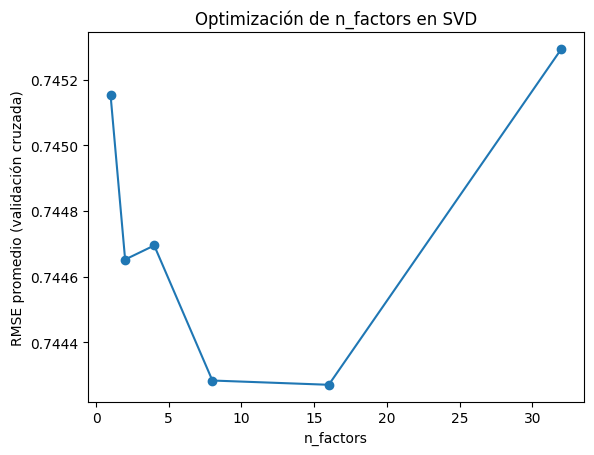

In [36]:
import matplotlib.pyplot as plt

plt.plot(factores, rmse_test_means, marker='o')
plt.xlabel('n_factors')
plt.ylabel('RMSE promedio (validación cruzada)')
plt.title('Optimización de n_factors en SVD')
plt.show()

- RMSE más bajo está cerca de n_factors = 8 o n_factors = 16, ya que ahí la curva llega a su punto mínimo antes de volver a   subir.
- Con muy pocos factores (1 o 2) hay underfitting → el modelo no tiene capacidad suficiente para capturar patrones.
- Con demasiados factores (32) el RMSE empeora → posible overfitting.
- Un rango óptimo estaría entre 8 y 16 factores.

In [18]:
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [1,2,4,8,16,32],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [ ]:
# Observamos performance del mejor modelo

# Mejor combinación encontrada
print(gs.best_score['rmse'])

# Mejor RMSE obtenido
print(gs.best_params['rmse'])

0.7438799077369475
{'n_factors': 8, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## Guardamos el modelo para la API

In [ ]:
import pickle
# Guardar el modelo en un archivo
with open('modeloDeRecomendacion.pkl', 'wb') as archivo:
    pickle.dump(ModeloEntrenado, archivo)

In [ ]:
df = pd.read_json('../ETL-EDA\EDA\EDA_Dataset.json.gz') 

In [39]:
import pandas as pd

def recomendacion_usuario(usuario:str):
    # Llamamos al dataset que realizamos en el momento de preparar los datos para el EDA
    df = pd.read_json('../ETL-EDA/EDA/EDA_Dataset.json.gz') 

    # Nos quedamos con las columnas necesarias
    df = df[['user_id','item_name','item_id']]

    # Filtramos los items que tiene el usuario
    tieneUsuario = df[df['user_id'] == usuario]
    tieneUsuario.drop(columns=['user_id'], inplace=True)
    tieneUsuario.reset_index(drop=True, inplace=True)

    # En caso que no encuentre el usuario estaria vacio entonces directamente retorna que no existe
    if tieneUsuario.empty:
        return {'Error': 'El usuario no existe'}

    # Sacamos los juegos que tiene el usuario para no recomendar uno que ya tenga
    juegos = df[['item_name','item_id']].copy()
    juegos.index = df['item_id']
    juegos.drop_duplicates(inplace=True)
    juegos.drop(tieneUsuario.item_id, inplace=True)

    # Cargamos el modelo que lo guardamos en formato pickle
    with open(r'../ML\modeloDeRecomendacion.pkl', 'rb') as archivo:
        modeloML = pickle.load(archivo)

    # Generamos la clasificacion de que tanto recomendado es para el usuario cada item con la prediccion del modelo
    juegos['Clasificacion'] = juegos['item_name'].apply(lambda x: modeloML.predict(usuario, x).est)

    # Nos quedamos con los 5 mas recomendados
    recomendacion = list(juegos.sort_values('Clasificacion', ascending=False).head(5)['item_name'].values)

    return {f'Juegos recomendados para {usuario}': recomendacion}

In [40]:
recomendacion_usuario('maplemage')

C:\Users\admin\AppData\Local\Temp\ipykernel_11504\3035602633.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tieneUsuario.drop(columns=['user_id'], inplace=True)


{'Juegos recomendados para maplemage': ["King Arthur's Gold",
  'Everlasting Summer',
  'Call of Juarez Gunslinger',
  'The Wolf Among Us',
  'Dust: An Elysian Tail']}